In [1]:
import numpy as np
import pandas as pd
from time import time
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import math
import random
from numba import jit
import seaborn as sb

# Q1

In [2]:
@jit
def MP(v,wk,x,tm,dt,step,sim):
    membrance_potential=[]
    i=0
    X=x
    for i in range(sim):
        while i<step:
            vk=v*(1-np.exp(-dt*i))
            a=vk * wk * tm
            b=(vk * (wk**2) * tm)
            X= X + dt * ((-X + a)/tm) + np.sqrt(b*dt)*np.random.normal()
            i=i+1
        membrance_potential.append(X)
    return membrance_potential

In [3]:
v=10
wk=0.01
x=10
tm=1
dt=0.001
step=1000
sim=100

In [4]:
Q1=MP(v,wk,x,tm,dt,step,sim)

In [5]:
a=tm * v *wk
b=(v * (wk**2) * tm)
avg=a
sd=np.sqrt(2*b)
NOR=np.random.normal(avg,sd,1000)

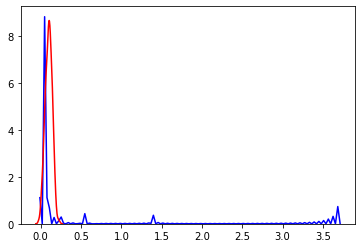

In [6]:
sb.kdeplot(Q1,color='blue')
sb.kdeplot(NOR,color='red')


# Q2

In [7]:
# deterministic expected time
# Using the last slide in lecture 16
@jit
def deter(c,x,vk,wk,tm):
    a=vk * wk * tm
    b= (vk * (wk**2) * tm)
    A= np.exp( (-2*a*x)/b)
    B=(c-1)*(np.exp((2*a*(1+c))/b))
    C=(x-1)*(np.exp((2*a*(1+x))/b))
    D=(x-c)*(np.exp((2*a*(c+x))/b))
    E= a * (np.exp(2*a / b) - np.exp(2*a*c/b))
    F= (A *(B-C+D))/E
    return F

In [8]:
@jit
def sim2(c,x,vk,wk,tm,dt,sim):
    jump_time_of_each_sim=np.zeros(sim)
    a=vk * wk * tm
    b= (vk * (wk**2) * tm)
    for i in range(sim):
        X=x
        j=0
        while True:
            X= X + dt * ((-X + a)/tm) + np.sqrt(b*dt)*np.random.normal()
            time = j*dt
            if (X<=c or X>=1):
                tmie=j*dt
                break
            j=j+1
        jump_time_of_each_sim[i]=time
    mean_time=np.mean(jump_time_of_each_sim)
    return mean_time

In [9]:
tm=1
wk=0.1
vk=0.1
sim=100
dt=0.001
x=0.5
c=-0.1


In [10]:
Q2E=deter(c,x,vk,wk,tm)
Q2S=sim2(c,x,vk,wk,tm,dt,sim)

In [11]:
print("the value from ODE solution is "+str(Q2E)+ " and the mean for solution is "+str(Q2S))

the value from ODE solution is 49.9993241673251 and the mean for solution is 91454.24761999998


# Q 5

In [12]:
N=1000
MU=[0.1/N,1/N,10/N]


In [13]:
def evolution(mu12,mu23,N):
    time12=[]
    time23=[]
    N1=[N]
    N2=[0]
    N3=[0]
    t=0
    i=0
    r=np.random.rand()
    A=(mu12*N1[i])
    N1.append(N1[i]-A)
    N2.append(N2[i]+A)
    N3.append(0)
    t12 =t+r
    i =i+1
    while N1[i]>0:
        r=np.random.rand()
        a=(mu12*N1[i])
        if (N1[i]-a>=0):
            N1.append(N1[i]-a)
            N2.append(N2[i]+a)
            b=(mu23*N2[i])
            if (N2[i]-b>=0):
                N2.append(N2[i]-b)
                N3.append(N3[i]+b)
        
        t = t+r
        time12.append(t)
        i=i+1 
#         else:
#             break

    return N1,N2,N3,time12

In [18]:
N1,N2,N3,time=evolution(0.1,0.1,100)

MemoryError: 

In [ ]:
plt.plot(N1,label='evolution of genotype 1')
plt.plot(N2,label='evolution of genotype 2')
plt.plot(N3,label='evolution of genotype 3')
plt.title("For mu = "+str(MU[2]))
plt.show()